In [1]:
# Imports
import matplotlib.pyplot as plt
from preamble import *
from DRN_interface import *
from pbarlike import *
# np.set_printoptions(precision=5)

 Loading python backend - pbarlike 1.0
 Imported required python modules - numpy, tensorflow, iminuit.Minuit
 Loaded and processed AMS-02 dataset
 Loaded required custom python modules - DRN_interface, solar_mod
     Loaded pbarlike 1.0


In [2]:
# Reusable params that give preference for DM and other default or best fit params
## Params that give DM preference for run1 + b bbar + marginalization over multinest sample
mDMrun1bb = np.array([100])
svDMrun1bb = 10**(-25.5228)
b_bbar_bf = np.array([0,0,1,0,0,0,0,0])
pmrun1 = "run1"

## Params that give DM preference for DIFF.BRK _ b bbar + marginalization
mDMdb_bb = np.array([2000])
svDMdb_bb = 6e-26
b_bbar_bf = np.array([0,0,1,0,0,0,0,0])
pmdb = "DIFF.BRK"

pp_marg = np.array([0.0])

## From example notebook
m_DM = np.array([100.])
equal_bf = np.ones((1, 8))* 1/8
def_sv = 10**(-25.5228)
pp_run1 = np.array([1.8, 1.79, 2.405, 2.357, 7.92e+03, 0.37, 2.05e+28, 0.419, 8.84, 0.09, 2.60])
pp_db = np.array([2.34, 2.28, 3.63e+28, -0.66, 0.52, -0.15, 3.83e+3, 0.4, 2.05e+5, 0.21])

## Multinest sample
ppdbmarg = np.genfromtxt('dependencies/'+ pmdb +'/multinest_sample.dat')

## Scalar Singlet
# lambda_hS = 0.0001
bf_ss_0001 = np.fromstring('0.00000000e+00 1.02133998e-06 2.40315289e-03 0.00000000e+00 7.41973454e-01 2.55334994e-01 0.00000000e+00 0.00000000e+00',sep=' ')
sigma_v_ss_0001 = 1.701045825869065e-31
# lambda_hS = 0.001
bf_ss_001 = np.fromstring('0.00000000e+00 4.40629758e-07 6.23447950e-06 1.81820266e-02 4.89115645e-01 2.43878879e-01 0.00000000e+00 2.48815994e-01',sep=' ')
sigma_v_ss_001 = 2.369587247718693e-31

In [3]:
# Setting params for check
DMmass = m_DM#np.array([10**(5.018181818181818 - 3)]) 
bf = bf_ss_0001
prop_params = pp_marg #np.array(ppdbmarg[0,:10])
sigma_v = sigma_v_ss_0001 #5.336699231206302e-27 
prop_model = pmdb
prevent_ex = True

In [4]:
# Initializing DRN
DRN = DRNet(propagation_parameters=prop_params,propagation_model=prop_model,prevent_extrapolation=prevent_ex,data=phi_ams,errors=error_ams,cov_inv=ams_cov_inv)

The number of propagation parameters is not consistent with the propagation model. The default multinest sample will be used for marginalization.

 The simulation tool has been initiated. 



In [5]:
# Unmodulated and solar modulated secondary antiproton fluxes
DRN.phi_CR_LIS,DRN.phi_CR


(<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
 array([[4.4431342e-03, 6.2424173e-03, 9.0337219e-03, 1.3011864e-02,
         1.7967613e-02, 2.2995971e-02, 2.6557745e-02, 2.7313534e-02,
         2.4880413e-02, 2.0148272e-02, 1.4663270e-02, 9.6997619e-03,
         5.8958312e-03, 3.3327697e-03, 1.7713162e-03, 9.0158224e-04,
         4.4571242e-04, 2.1590429e-04, 1.0279409e-04, 4.8201666e-05,
         2.2363189e-05, 1.0288032e-05, 4.6990417e-06, 2.1362061e-06,
         9.7433428e-07, 4.5327437e-07, 2.1091472e-07, 9.7959088e-08]],
       dtype=float32)>,
 array([[6.37562447e-03, 8.07946326e-03, 9.99459754e-03, 1.18229813e-02,
         1.35893411e-02, 1.51944565e-02, 1.62900199e-02, 1.73323694e-02,
         1.75154775e-02, 1.75388567e-02, 1.71154002e-02, 1.62387016e-02,
         1.53765012e-02, 1.39897998e-02, 1.26693370e-02, 1.13403237e-02,
         9.90903393e-03, 8.66232659e-03, 7.43958722e-03, 6.31923127e-03,
         5.37409187e-03, 4.48885571e-03, 3.73496446e-03, 3.10498572e-03,
   

In [6]:
# Preprocessing DM params
DRN.preprocessing_DMparams(DM_mass=DMmass,br_fr=bf,sigma_v=sigma_v)

In [7]:
# DM simulation
phi_DM_LIS = DRN.LIS_sim()
phi_DMCR = DRN.TOA_sim(phi_DM_LIS)

In [8]:
# Unmodulated primary antiproton flux
phi_DM_LIS

array([[5.33704812e-08, 5.50933830e-08, 5.50835568e-08, 5.32059752e-08,
        4.96269744e-08, 4.44980051e-08, 3.83099454e-08, 3.15698914e-08,
        2.47205472e-08, 1.83432965e-08, 1.26716715e-08, 8.16769357e-09,
        4.89640493e-09, 2.69451019e-09, 1.32863698e-09, 5.70919871e-10,
        2.06924533e-10, 5.83689829e-11, 1.12691049e-11, 1.35968124e-12,
        1.20794104e-13, 3.51899148e-14, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [9]:
# Total solar modulated predicted antiproton flux
phi_DMCR

array([[6.37564264e-03, 8.07948302e-03, 9.99461796e-03, 1.18230030e-02,
        1.35893647e-02, 1.51944809e-02, 1.62900428e-02, 1.73323904e-02,
        1.75154968e-02, 1.75388743e-02, 1.71154165e-02, 1.62387171e-02,
        1.53765158e-02, 1.39898131e-02, 1.26693491e-02, 1.13403345e-02,
        9.90904338e-03, 8.66233485e-03, 7.43959432e-03, 6.31923729e-03,
        5.37409699e-03, 4.48885943e-03, 3.73496695e-03, 3.10498729e-03,
        2.55304809e-03, 2.10457911e-03, 1.73101068e-03, 1.40893175e-03,
        1.14296873e-03, 9.28834784e-04, 7.52980441e-04, 6.09952148e-04,
        4.93134217e-04, 3.97794925e-04, 3.21372666e-04, 2.59934614e-04,
        2.10667104e-04, 1.70393883e-04, 1.37700199e-04, 1.11347688e-04,
        8.99867807e-05, 7.27275711e-05, 5.87774781e-05, 4.75507764e-05,
        3.84283721e-05, 3.10555455e-05, 2.50691793e-05, 2.02204194e-05,
        1.63036957e-05, 1.17287196e-05, 7.53394105e-06, 4.82380597e-06,
        3.01572678e-06, 1.80768203e-06, 1.04473625e-06, 6.177622

In [10]:
# Uncorrelated and correlated chi squares
DRN.chi2(phi_DMCR),DRN.chi2_CR_uncorr,DRN.chi2_cov(phi_DMCR),DRN.chi2_CR_corr

(array([40.44264808]),
 array([40.44304443]),
 array([93.3434774]),
 array([93.34340466]))

In [11]:
# Uncorrelated and correlated log likelihood ratios
del_chi2 = DRN.del_chi2(phi_DMCR)
del_chi2_corr = DRN.del_chi2_corr(phi_DMCR)
result = {'uncorrelated' : del_chi2 , 'correlated' : del_chi2_corr}

In [12]:
# Results
print('del_chi2 = ', result["uncorrelated"])
print('del_chi_cov = ', result["correlated"])

del_chi2 =  0.00019817644129099305
del_chi_cov =  -3.6368876756440704e-05


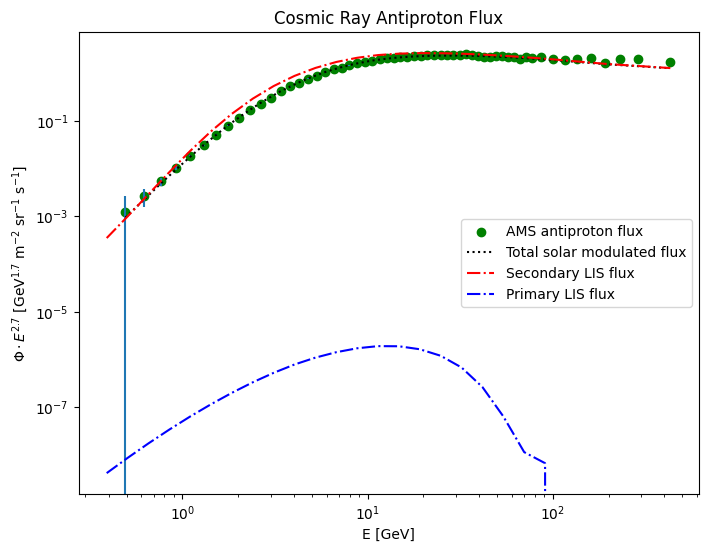

In [13]:
# Plot of solar modulated DM+CR flux and AMS flux
DM_LIS = phi_DM_LIS[0]
S_flux = DRN.phi_CR_LIS[0]
DMCR_flux = phi_DMCR[0]

DM_E = E_ams
S_E = E_ams

plt.figure(figsize=(8,6))
plt.title('Cosmic Ray Antiproton Flux')
plt.scatter(E_ams, E_ams**2.7 * phi_ams, c='g', label = 'AMS antiproton flux')
plt.errorbar(E_ams,E_ams**2.7*phi_ams,error_ams,linestyle = '')
plt.plot(DM_E, DM_E**2.7 * DMCR_flux,  c = 'black', linestyle = 'dotted', label = 'Total solar modulated flux')
plt.plot(E_drn, E_drn**2.7 * S_flux,c='r', linestyle = 'dashdot', label = 'Secondary LIS flux ')
plt.plot(E_drn, E_drn**2.7 * DM_LIS,c='b', linestyle = 'dashdot', label = 'Primary LIS flux')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\Phi \cdot E^{2.7}$ [GeV$^{1.7}$ m$^{-2}$ sr$^{-1}$ s$^{-1}$]')
plt.xlabel('E [GeV]')
plt.show()
